In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Observing the data set

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Name of all the columns
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# As these columns are not going to affect our prediction, hence dropping them

In [4]:

dataset = dataset.drop(columns=['Name','PassengerId','Ticket'])


# Visualizing Missing data

Age and Cabin has very high numbers of Missing Data


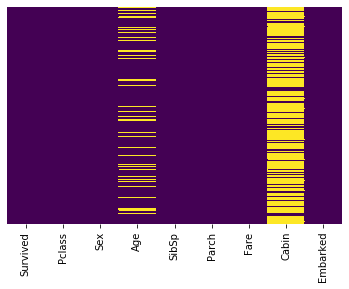

In [5]:

sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('Age and Cabin has very high numbers of Missing Data')

# As Cabin has very high NAN data, so droping that entire column

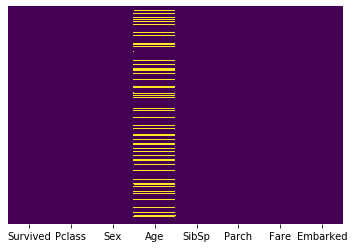

In [6]:


dataset = dataset.drop(columns=['Cabin'])

sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 We want to fill in missing age data instead of just dropping the missing age data rows.
 One way to do this is by filling in the mean age of all the passengers
(imputation). However we can be smarter about this and check the average
age by passenger class.

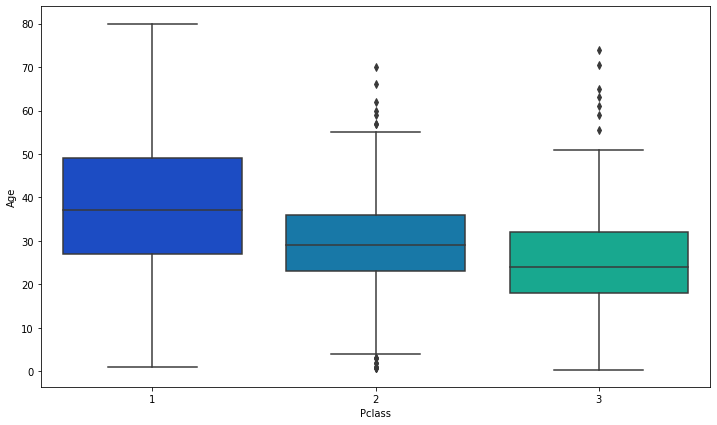

In [7]:


plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

# Code to loop through all age values and replacing NaN values according to Pclass

In [8]:
# Code to loop through all age values and replacing NaN values 
# according to Pclass

age = dataset["Age"].to_numpy()
pes_class = dataset["Pclass"].to_numpy()

for i in range(len(age)):
    if np.isnan(age[i]):
        if pes_class[i]==1:
            age[i]=37
        elif pes_class[i]==3:
            age[i]=29
        else:
            age[i]=24
        
data = {'Age2':age} 
  
# Create DataFrame 
AGE = pd.DataFrame(data) 

# Dropping old Age column and Adding the new Age values

In [9]:
dataset = dataset.drop(columns=['Age'])


dataset = pd.concat([dataset,AGE],axis=1)


In [10]:
dataset.head(15)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age2
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0
5,0,3,male,0,0,8.4583,Q,29.0
6,0,1,male,0,0,51.8625,S,54.0
7,0,3,male,3,1,21.0750,S,2.0
8,1,3,female,0,2,11.1333,S,27.0
9,1,2,female,1,0,30.0708,C,14.0


# Visualization of features

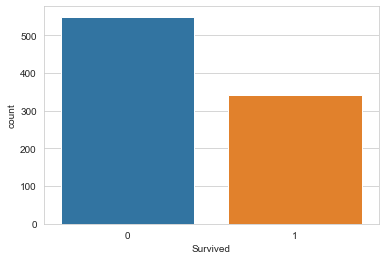

In [11]:


sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dataset)

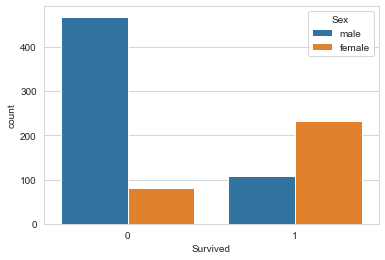

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataset)

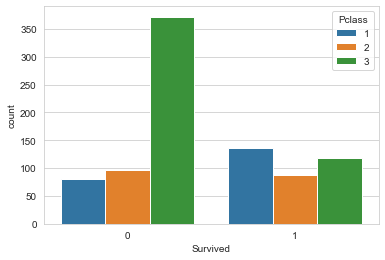

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset)

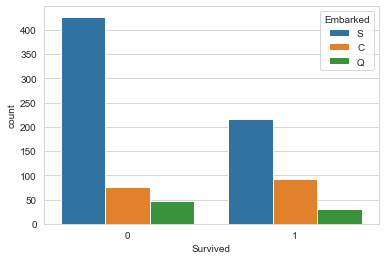

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=dataset)

# Encoding the Categorical Variables

In [15]:


sex = pd.get_dummies(dataset.Sex,drop_first=True)
embarked = pd.get_dummies(dataset.Embarked,drop_first=True)

# Droping the first column to avoid Dummy variable Trap



In [16]:
# Dropping 'Sex' and 'Embarked'
dataset = dataset.drop(columns=['Sex','Embarked'])

# Adding their One_Hot_Encoded values
dataset_OHE = pd.concat([dataset,sex,embarked],axis=1)
dataset_OHE

,Survived,Pclass,SibSp,Parch,Fare,Age2,male,Q,S
0,0,3,1,0,7.2500,22.0,1,0,1
1,1,1,1,0,71.2833,38.0,0,0,0
2,1,3,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,53.1000,35.0,0,0,1
4,0,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.0,1,0,1
887,1,1,0,0,30.0000,19.0,0,0,1
888,0,3,1,2,23.4500,29.0,0,0,1
889,1,1,0,0,30.0000,26.0,1,0,0


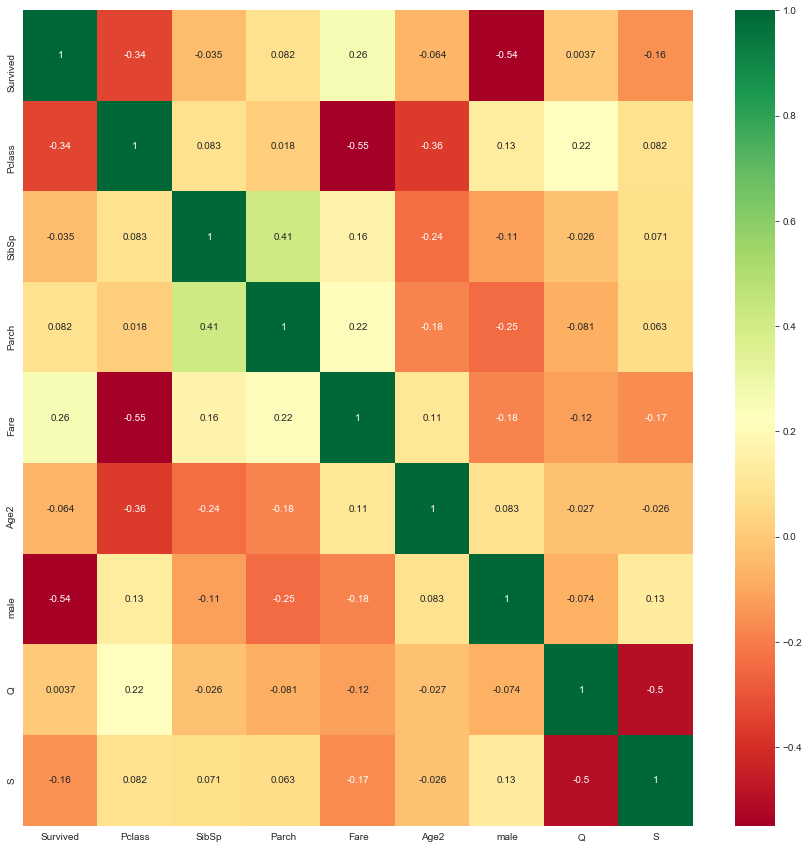

In [17]:
#Now using pairplot to visualize the relation between features

corrmat = dataset_OHE.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

# It can be seen that, Pclass,Fare,Sex,Embarked has high coorelation with survival
g = sns.heatmap(dataset_OHE[top_corr_features].corr(),annot=True,cmap="RdYlGn")

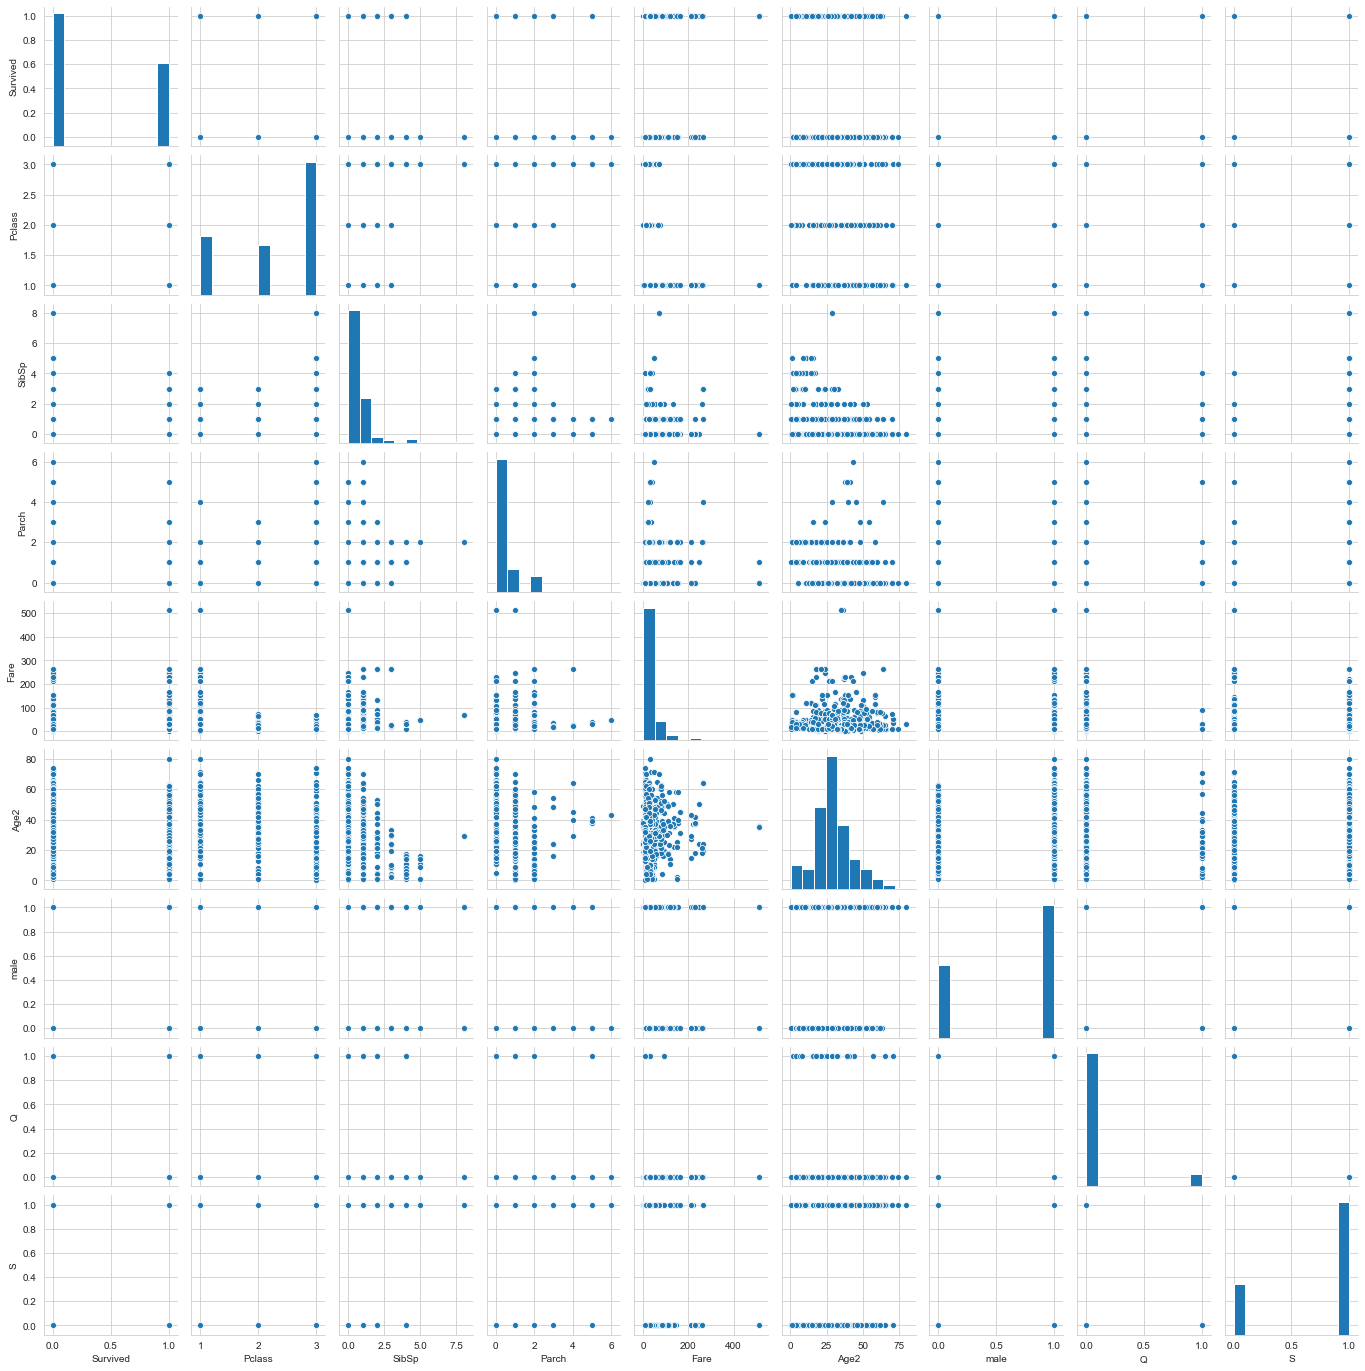

In [18]:
sns_plot = sns.pairplot(dataset_OHE,height=2.1)
sns_plot.savefig("output.png")

# Splitting into X and y

In [19]:
X=dataset_OHE.iloc[:,1:] ## independent features
y=dataset_OHE.iloc[:,0] ## dependent features

# Training and Test Sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Grid Search CV (Random_forest)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

Grid_search = GridSearchCV(rfc,param_grid, cv=5)

# Fitting the model
Grid_search.fit(X_train,y_train)

print('Thsese are the best performed parameters')
print(Grid_search.best_params_)

Thsese are the best performed parameters
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}


# Random_forest_Classification

In [22]:

from sklearn.model_selection import cross_val_score



model=RandomForestClassifier(max_depth=8,n_estimators=500,max_features= 'log2',criterion= 'entropy')
model.fit(X_train,y_train)


scores=cross_val_score(model,X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.7972028  0.81118881 0.85915493 0.80985915 0.83802817]
0.823086772382547


# Make predictions for validation data

In [23]:

y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i]>0:
        y_pred[i] = 1
    else:
        y_pred[i]=0


# Accuracy Check

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.80%


# Saving the model

In [25]:

# open a file, where you ant to store the data
file = open("Random_forest_CV_search_Titanic.pkl", 'wb')

# dump information to that file
pickle.dump(model, file)

#closing the file
file.close()

In [26]:
# Loading Pickled file
model_loaded = pickle.load(open("Random_forest_CV_search_Titanic.pkl", "rb"))

open("Random_forest_CV_search_Titanic.pkl", "rb").close

<function BufferedReader.close>

In [27]:
model_loaded

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Testing on Kaggle data set

In [28]:
Test = pd.read_csv('test.csv')
Test = Test.drop(columns=['Name','PassengerId','Ticket','Cabin'])

# Code to loop through all age values and replacing NaN values 
# according to Pclass

age = Test["Age"].to_numpy()
pes_class = Test["Pclass"].to_numpy()

for i in range(len(age)):
    if np.isnan(age[i]):
        if pes_class[i]==1:
            age[i]=37
        elif pes_class[i]==3:
            age[i]=29
        else:
            age[i]=24
        
data = {'Age2':age} 
  
# Create DataFrame 
AGE = pd.DataFrame(data) 

Test = Test.drop(columns=['Age'])

# Adding their One_Hot_Encoded values
Test = pd.concat([Test,AGE],axis=1)

# Encoding the Categorical Variables
# Droping the first column to avoid Dummy variable Trap
sex = pd.get_dummies(Test.Sex,drop_first=True)
embarked = pd.get_dummies(Test.Embarked,drop_first=True)

# Dropping 'Sex' and 'Embarked'
Test = Test.drop(columns=['Sex','Embarked'])

# Adding their One_Hot_Encoded values
X_Test = pd.concat([Test,sex,embarked],axis=1)
X_Test


,Pclass,SibSp,Parch,Fare,Age2,male,Q,S
0,3,0,0,7.8292,34.5,1,1,0
1,3,1,0,7.0000,47.0,0,0,1
2,2,0,0,9.6875,62.0,1,1,0
3,3,0,0,8.6625,27.0,1,0,1
4,3,1,1,12.2875,22.0,0,0,1
...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,29.0,1,0,1
414,1,0,0,108.9000,39.0,0,0,0
415,3,0,0,7.2500,38.5,1,0,1
416,3,0,0,8.0500,29.0,1,0,1


In [29]:
X_Test.fillna(X_Test.mean())

,Pclass,SibSp,Parch,Fare,Age2,male,Q,S
0,3,0,0,7.8292,34.5,1,1,0
1,3,1,0,7.0000,47.0,0,0,1
2,2,0,0,9.6875,62.0,1,1,0
3,3,0,0,8.6625,27.0,1,0,1
4,3,1,1,12.2875,22.0,0,0,1
...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,29.0,1,0,1
414,1,0,0,108.9000,39.0,0,0,0
415,3,0,0,7.2500,38.5,1,0,1
416,3,0,0,8.0500,29.0,1,0,1


In [30]:
y_pred=[]
y_pred = model_loaded.predict(X_Test.fillna(X_Test.mean()))

for i in range(len(y_pred)):
    if y_pred[i]>0:
        y_pred[i] = 1
    else:
        y_pred[i]=0


In [31]:
Result = pd.read_csv('test.csv')
Result = Result.drop(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

col = {'Survived':y_pred.T} 
  
# Create DataFrame 
Surv = pd.DataFrame(col) 

Result = pd.concat([Result,Surv],axis=1)

In [32]:
Result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
Result.to_csv (r'C:\Users\mohan\Desktop\Deep_learning_coursera\titanic (1)\Result_rend_forest.csv', index = False, header=True)